In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Q1: Coin toss

Read section 2.1 of Sivia and recreate figure 2.3.

## (a)

Define the prior functions

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2195: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = [asarray(arg) for arg in args]


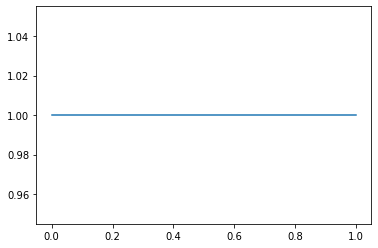

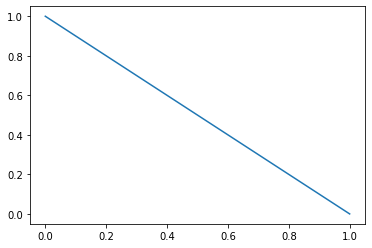

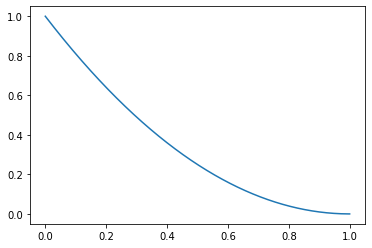

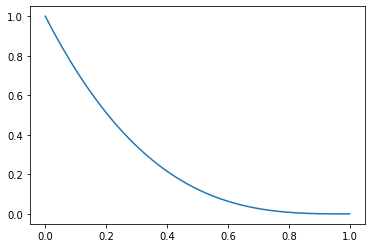

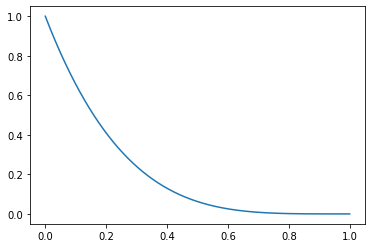

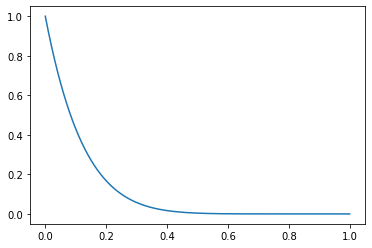

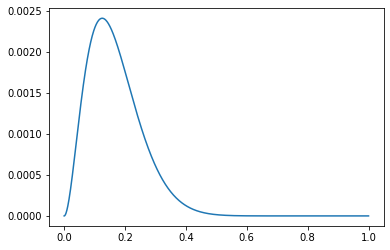

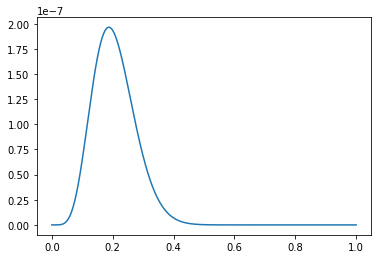

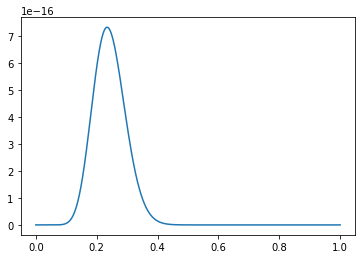

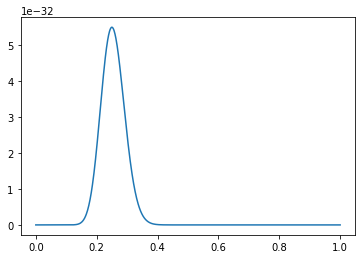

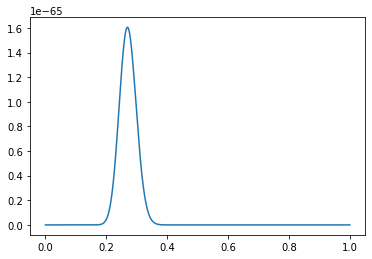

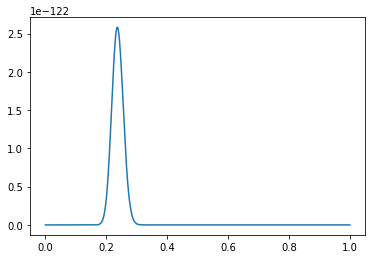

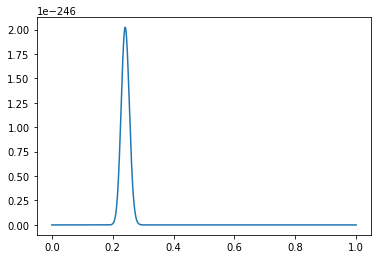

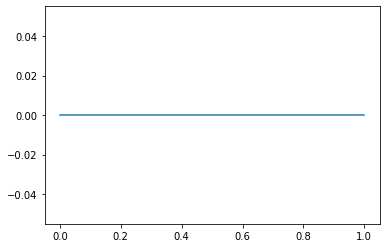

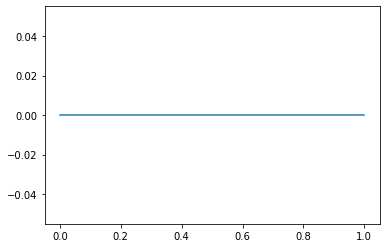

In [5]:
import numpy as np
from matplotlib import pyplot as plt

def uniform_prior(H):
    if  H > 1 or H < 0:
        return 0
    
    return 1


#Generating 5000 data point given H = 0.25
N = 5000
data = np.random.choice(['H', 'T'], N, p=[0.25, 0.75])

#Picking subset sizes 
size = [0, 1, 2, 3, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]

#Creating sebsets of the original data that have specific sizes  
sub_data = []
for i in size:
  sub_data.append([data[k] for k in range(i)])

#Liklihood function is a Bernoulli trial with probabilities H and 1-H
def likelihood(dl, H):
  heads = dl.count("H")
  return (H**heads) * (1-H)**(len(dl) - heads)

H_list = np.linspace(0, 1, 1000, dtype= np.longdouble)
#np.longdouble was used instead of np.float128

vlikelihood = np.vectorize(likelihood)

like_list = []

#Updating the prioir using Baye's rule

posterior = [] 
for h in H_list:
    posterior.append(vlikelihood(sub_data, h) * uniform_prior(h))

#Plotting
for x in range(len(size)):
    test = []
    for h in range(len(H_list)):
        test.append(posterior[h][x])
    plt.plot(H_list ,test)
    plt.show()


### Bonus point

Why do we need to use np.vectorize here?

## (b)

Create an array for H, calculte the priors, normalize them and then plot them.

In [6]:
H = np.linspace(0, 1, 1000, dtype=np.float128)

In [15]:
plt.figure(figsize=(15, 3))
plt.suptitle('Three different priors (Normalized)')

#plt.subplot(...)

#...

#plt.show()

Text(0.5, 0.98, 'Three different priors (Normalized)')

<Figure size 1080x216 with 0 Axes>

## (c)

Here we explicitly declared a data type for the array H. Although most of the times python does it for us, here was an example that we need to do it by hand to avoid round-off error. Find out what this error is and write a few lines about it (In Farsi or English) and explain what did we do to avoid it here. In other words, why did we use 'np.float128' exept just using 'float'?

You can also emit the data type decleration from the definition of H and see what happens in calculating the posterior.

any variable can store a certain number of digits, if you do mathmatical operations on these numbers sometimes accuracy can be affected because there isn't enough space to store the correct number 
for example imagine we can only store 1 decimal point and we want to add 1.82 and 2.16 which is 3.98 and it will be rounded to 4. then if we need more accuracy than that problems will ensuit 

## (d)

Write a proper function to calculate the psterior for a given data and recreate the given plot.

In [ ]:
data = [np.random.choice([0, 0, 0, 0, 0, 0, 0, 1, 1, 1], size=(i)) for i in range(4)]  
data.extend([np.random.choice([0, 0, 0, 0, 0, 0, 0, 1, 1, 1], size=(2**i)) for i in range(2, 13)])

In [ ]:
def posterior(...):
    ones = ...
    zeros = ...
    
    ...
    
    return ...

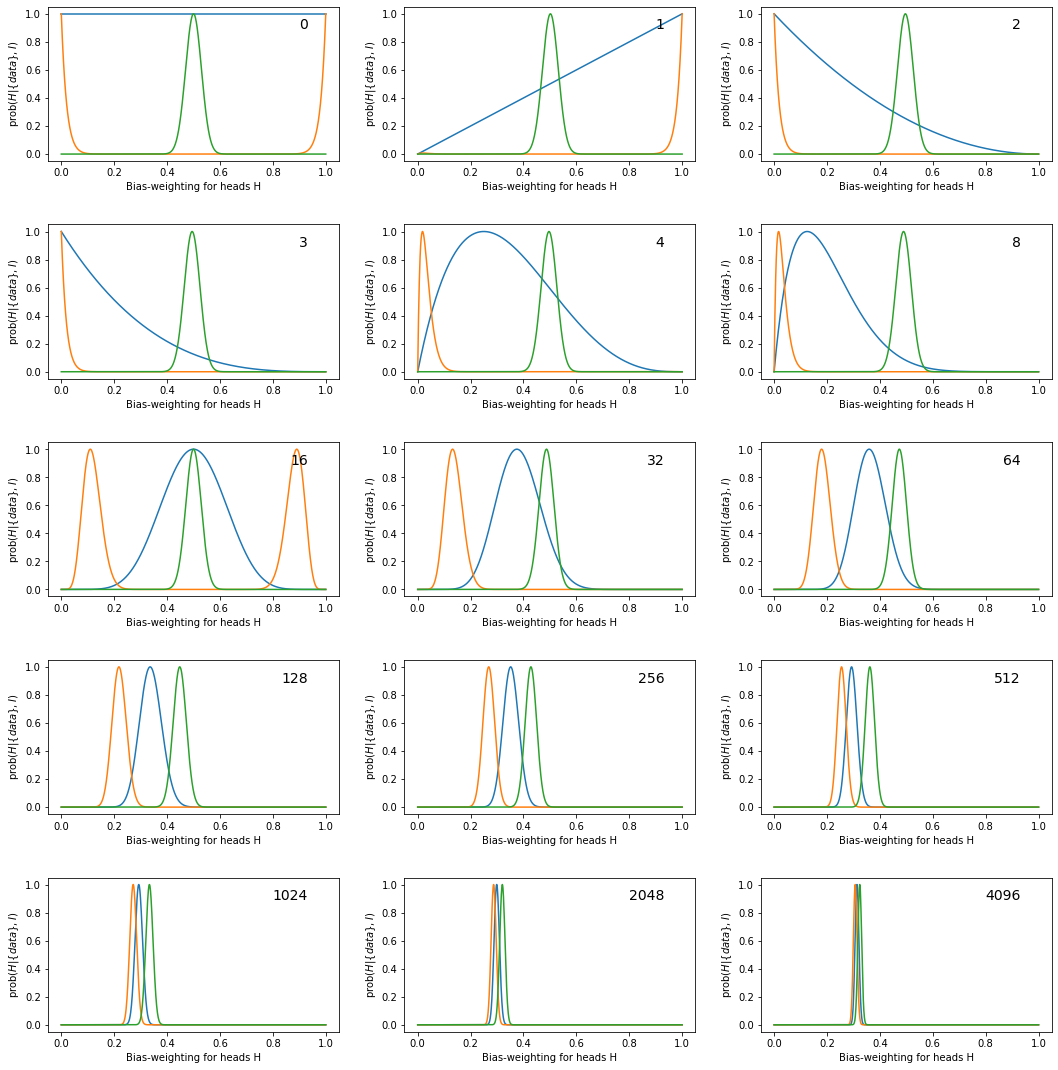

In [ ]:
plt.figure(figsize=(15, 15))


for i in range(15):
    ...
    
    
plt.tight_layout(h_pad=3)
plt.show()

# Q2: Distributions and moments

## (a)

Write a function to calculate raw moments of a given distribution 

In [7]:
def nth_raw_moment(dist, n):
  return np.sum((np.array(dist)**n))/len(dist)

test = [1,2,3,4,5,6,7,8,9,10]

print(nth_raw_moment(test, 1))

5.5


## (b)

Write a function to calculate central moments of a given distribution

In [6]:
def nth_central_moment(dist, n):
  return np.sum(((np.array(dist)-np.mean(dist))**n) / len(dist))

test = [1,2,3,4,5,6,7,8,9,10]

print(nth_central_moment(test, 2))

8.25


## (c)

Using numpy.random, create a binomial (p=0.7, n=$30$), a Poisson ($\mu$ = 2.1) and a gaussian ($\mu$ = 2.1, $\sigma = 0.3$) distribution with size $10^6$ and calculate their first 3 raw and central moments

In [15]:
binomial = np.random.binomial(30, 0.7, size = 1000000)

poisson = np.random.poisson(lam = 2.1, size = 1000000)

normal = np.random.normal(loc = 2.1, scale = 0.3, size = 1000000)

#dists = [binomial, poisson, normal]


#raw moments
#binomial
print('first raw moment of the binomial distribution = ', nth_raw_moment(binomial, 1))
print('second raw moment of the binomial distribution = ', nth_raw_moment(binomial, 2))
print('third raw moment of the binomial distribution = ', nth_raw_moment(binomial, 3))

#raw moments
#poisson

print('first raw moment of the poisson distribution = ', nth_raw_moment(poisson, 1))
print('second raw moment of the poisson distribution = ', nth_raw_moment(poisson, 2))
print('third raw moment of the poisson distribution = ', nth_raw_moment(poisson, 3))


#raw moments
#normal

print('first raw moment of the normal distribution = ', nth_raw_moment(normal, 1))
print('second raw moment of the normal distribution = ', nth_raw_moment(normal, 2))
print('third raw moment of the normal distribution = ', nth_raw_moment(normal, 3))


#central moments
#binomial
print('first central moment of the binomial distribution = ', nth_central_moment(binomial, 1))
print('second central moment of the binomial distribution = ', nth_central_moment(binomial, 2))
print('third central moment of the binomial distribution = ', nth_central_moment(binomial, 3))

#central moments
#poisson

print('first central moment of the poisson distribution = ', nth_central_moment(poisson, 1))
print('second central moment of the poisson distribution = ', nth_central_moment(poisson, 2))
print('third central moment of the poisson distribution = ', nth_central_moment(poisson, 3))


#central moments
#normal

print('first central moment of the normal distribution = ', nth_central_moment(normal, 1))
print('second central moment of the normal distribution = ', nth_central_moment(normal, 2))
print('third central moment of the normal distribution = ', nth_central_moment(normal, 3))

#Should have used a for loop
#what do these numbers mean?


first raw moment of the binomial distribution =  21.000407
second raw moment of the binomial distribution =  447.321881
third raw moment of the binomial distribution =  9656.162909
first raw moment of the poisson distribution =  2.100677
second raw moment of the poisson distribution =  6.508681
third raw moment of the poisson distribution =  24.564917
first raw moment of the normal distribution =  2.0998838002648017
second raw moment of the normal distribution =  4.499577648332986
third raw moment of the normal distribution =  9.82685763158511
first central moment of the binomial distribution =  8.621575675604731e-16
second central moment of the binomial distribution =  6.304786834350997
third central moment of the binomial distribution =  -2.584831144792145
first central moment of the poisson distribution =  -8.32396217925746e-17
second central moment of the poisson distribution =  2.0958371416709998
third central moment of the poisson distribution =  2.0869267644549767
first central 

## (d)

Using scipy.stats, calculate the first three moments of these distributions and check with the results from your own function. What does the function in scipy calculate? Raw moments or central moments?

In [13]:
from scipy import stats

In [19]:
print(np.var(binomial))

#scipy calculates CENTRAL momnets

6.304786834351


# Q3: Radioactive decay

The Poisson distribution is often used to describe situations in which an event occurs repeatedly at a constant rate of probability. An application of this distribution involves the decay of radioactive samples, but only in the approximation that the decay rate is slow enough that depletion in the population of the decaying species can be neglected.

Now suppose we have a data set showing the number of $\alpha$ particles emmited in 7.5 sec intervals:

## (a)

Load the provided data into a pandas data frame and show the data and then plot it's PDF.

In [20]:
from pandas import DataFrame, read_csv

## (b)

Calculate total number of decays and the average number of decays after each time interval. Then add the data to the Pandas DataFrame and show it. Then save the data to file 'new_data.txt'.

## (c)

Use a unifor prior and do the same analysis as question 1 to get the mean decay number per interval. Plot the diagrams as well. (Beware that this time we have a Poisson distribution rather than a binomial one)

## (d)

Use two different priors of your choise and repeat the analysis. Which of these three priors leads to an answer sooner?

## (e)

Now that you have the average decay per time interval, calculate the half life of this radioactive element (Suppose that the sample is large enough not to lose a noticable fraction of the particles in the span of the experiment). Can find out what this element is?

# Bonus question

Do an error analysis and report how sure are you about the number you derived for the half life of the element.